Machine Learning
IMDB Database

Integrantes do Grupo:
    - Carlos Victor Prazeres Farias (04113719)
    - Cezar Augusto Holanda Mutran Filho (04111710)
    - Douglas Moura de Oliveira (04112935)
    - Giuliana Ferreira Toppino (04110782)
    - Giulio Ferreira Toppino (04110781)
    - Ricardo Alves dos Prazeres Junior (04090613)
    - Rikelvin Carmo do Espirito Santo (04113893)

In [5]:
# Importando as bibliotecas necessários  para o projeto
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [6]:
arquivo = 'imdb_movies.csv'

# Carregando o conteúdo do arquivo CSV em um DataFrame
conteudo = pd.read_csv(arquivo)

Refinamento dos dados do dataframe

In [7]:
# Convertendo o conteudo carregado do CSV em um DataFrame
df = pd.DataFrame(conteudo)

# Removendo colunas desnecessarias do DataFrame
df = df.drop(['overview', 'revenue', 'status', 'orig_title', 'crew'], axis=1)

# Removendo palavras ofencivas
palavras_ofensivas = ['hentai', 'orgasm', 'porno', 'pretty young']

for palavra_chave in palavras_ofensivas:
    df = df[~df['names'].str.contains(palavra_chave, case=False)]

In [8]:
# Variaveis para análise dos dados
# Encontrando o índice do filme com o maior orçamento
filme_maior_orçamento_ind = df['budget_x'].idxmax()

# Encontrando o índice do filme mais votado
filme_mais_votado_ind = df['score'].idxmax()

# Obtendo o nome do filme mais votado
filme_mais_votado= df.loc[filme_mais_votado_ind, 'names']

# Obtendo o nome do filme com o maior orçamento
nome_filme_maior_orcamento = df.loc[filme_maior_orçamento_ind, 'names']

# Obtendo o orçamento do filme com o maior orçamento
orcamento_filme_maior_orcamento = df.loc[filme_maior_orçamento_ind, 'budget_x']

In [9]:
# Salvando o DataFrame refinado em um arquivo CSV, sem incluir o índice do DataFrame no arquivo
df.to_csv('movies_refined.csv', index=False)

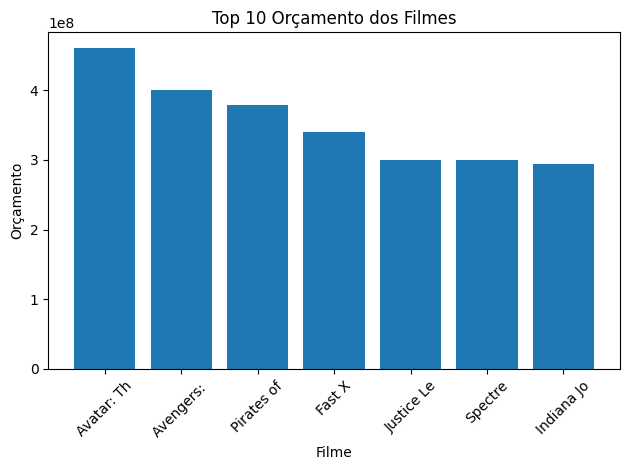

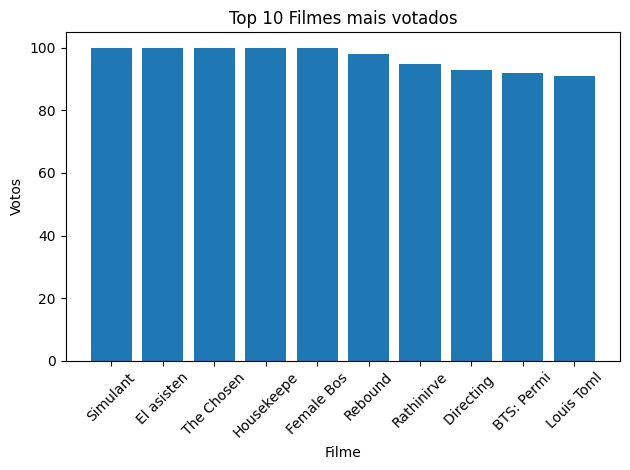

In [10]:
# Cortando os nomes dos filmes para os primeiros 10 caracteres
df['names'] = df['names'].str.slice(0, 10)

# Obtendo os 10 filmes com o maior orçamento
top_10_filmes_orcamento = df.sort_values(by='budget_x', ascending=False).head(10)

# Criando o gráfico de barras para os 10 filmes com o maior orçamento
plt.bar(top_10_filmes_orcamento['names'], top_10_filmes_orcamento['budget_x'])
plt.title('Top 10 Orçamento dos Filmes')
plt.xlabel('Filme')
plt.ylabel('Orçamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Obtendo os 10 filmes mais votados
top_10_filmes_votos = df.sort_values(by='score', ascending=False).head(10)

# Criando o gráfico de barras para os 10 filmes mais votados
plt.bar(top_10_filmes_votos['names'], top_10_filmes_votos['score'])
plt.title('Top 10 Filmes mais votados')
plt.xlabel('Filme')
plt.ylabel('Votos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Filmes Recomendados:
80                        A Frozen Rooster
187                                 Cars 3
228           Tom and Jerry Snowman's Land
244                                 Cars 2
251    The Ice Age Adventures of Buck Wild
303                              Toy Story
304         The Boss Baby: Family Business
334                                Ice Age
349                               Zootopia
387                  PAW Patrol: The Movie
Name: names, dtype: object


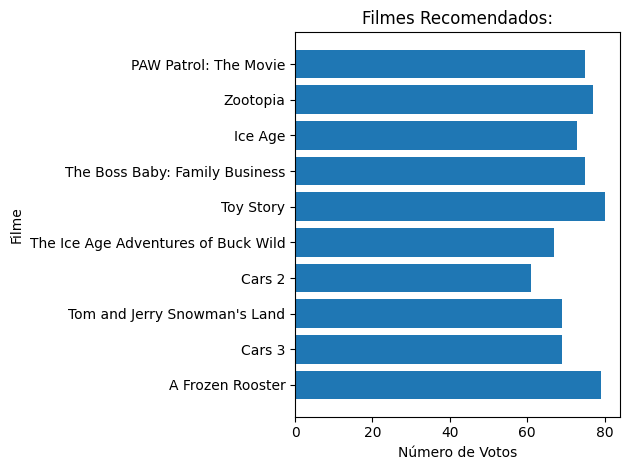

In [19]:
# Criando um DataFrame a partir do conteúdo carregado
df = pd.DataFrame(conteudo)

# Preenchendo os valores nulos com strings vazias
df.fillna('', inplace=True)

# Inicializando um vetorizador TF-IDF com 'stop words' em inglês
vetorizador = TfidfVectorizer(stop_words='english')

# Construindo a matriz TF-IDF a partir dos gêneros dos filmes
matriz = vetorizador.fit_transform(df['genre'])

# Calculando as similaridades de cosseno entre todos os pares de filmes
similaridades = linear_kernel(matriz, matriz)

# Definindo uma função para obter recomendações de filmes semelhantes
def obter_recomendacoes(nome_filme, similaridades=similaridades, df=df):
    indice_filme = df.index[df['names'] == nome_filme][0]
    similares = list(enumerate(similaridades[indice_filme]))
    similares = sorted(similares, key=lambda x: x[1], reverse=True)
    similares = similares[1:11]  # Excluindo o filme em si
    indices = [i[0] for i in similares]
    return df['names'].iloc[indices]

# Recomendações para o filme "Creed III"
recomendacoes = obter_recomendacoes('Cars')
print('Filmes Recomendados:')
print(recomendacoes)

# Um gráfico de barras horizontais para mostrar o número de votos dos filmes recomendados
plt.barh(recomendacoes, df['score'].iloc[recomendacoes.index])
plt.xlabel('Número de Votos')
plt.ylabel('Filme')
plt.title('Filmes Recomendados:')
plt.tight_layout()
plt.show()

